<a href="https://colab.research.google.com/github/OmidGhadami95/EfficientNet-PlantVillage/blob/main/EfficientNetV2B0_PlantVillage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import utils,  optimizers, losses
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical
import osqp
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import EfficientNetV2B0
from keras import Input
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset
%cd PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 31.15 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Updating files: 100% (182401/182401), done.
/content/PlantVillage-Dataset


In [3]:
fpath = "/content/PlantVillage-Dataset/raw/color"
random_seed = 111

categories = os.listdir(fpath)

In [4]:
os.listdir(fpath)

['Tomato___Bacterial_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Cherry_(including_sour)___healthy',
 'Apple___Black_rot',
 'Grape___Black_rot',
 'Tomato___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Potato___Early_blight',
 'Soybean___healthy',
 'Raspberry___healthy',
 'Pepper,_bell___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Strawberry___Leaf_scorch',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Apple___Apple_scab',
 'Peach___Bacterial_spot',
 'Grape___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Potato___Late_blight',
 'Tomato___Target_Spot',
 'Tomato___Late_blight',
 'Squash___Powdery_mildew',
 'Tomato___Septoria_leaf_spot',
 'Peach___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Corn_(maize)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Strawberry___healthy',
 'Grape___Esca_(Black_Measles)',
 'Apple___healthy',
 'Blueberry___healthy',
 'Tomato___Early_blight',
 'Apple___Cedar_

In [5]:
categories.remove("Tomato___Tomato_Yellow_Leaf_Curl_Virus")
categories.remove("Tomato___Target_Spot")
categories.remove("Tomato___Tomato_mosaic_virus")
categories.remove("Tomato___Bacterial_spot")
categories.remove("Apple___Cedar_apple_rust")
# categories.remove("Cherry_(including_sour)___healthy")
# categories.remove("Apple___healthy")
categories.remove("Pepper,_bell___healthy")
categories.remove("Tomato___Septoria_leaf_spot")
# categories.remove("Squash___Powdery_mildew")
categories.remove("Peach___healthy")
categories.remove("Tomato___Early_blight")
categories.remove("Cherry_(including_sour)___Powdery_mildew")
categories.remove("Tomato___Late_blight")
categories.remove("Grape___healthy")
categories.remove("Raspberry___healthy")
categories.remove("Pepper,_bell___Bacterial_spot")
categories.remove("Tomato___healthy")
categories.remove("Apple___Black_rot")
categories.remove("Tomato___Spider_mites Two-spotted_spider_mite")
categories.remove("Potato___healthy")
categories.remove("Peach___Bacterial_spot")
categories.remove("Strawberry___healthy")
categories.remove("Grape___Black_rot")
categories.remove("Blueberry___healthy")
categories.remove("Apple___Apple_scab")
categories.remove("Soybean___healthy")
categories.remove("Orange___Haunglongbing_(Citrus_greening)")
categories.remove("Grape___Esca_(Black_Measles)")
categories.remove("Strawberry___Leaf_scorch")
categories.remove("Grape___Leaf_blight_(Isariopsis_Leaf_Spot)")
categories.remove("Potato___Late_blight")
categories.remove("Potato___Early_blight")
categories.remove("Tomato___Leaf_Mold")
print("All the class labels:- ",categories,"\n\nNo. of categories = ", len(categories))

All the class labels:-  ['Cherry_(including_sour)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Squash___Powdery_mildew', 'Corn_(maize)___healthy', 'Apple___healthy', 'Corn_(maize)___Common_rust_'] 

No. of categories =  7


In [6]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category)[:1000]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg"):
                img = cv2.imread(fpath+"/"+category+"/"+image_name)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img_array = Image.fromarray(img, 'RGB')
                resized_img = img_array.resize((128, 128))
                img_lst.append(np.array(resized_img))
                labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  6352 
No. of labels loaded =  6352
<class 'list'> <class 'list'>


In [7]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (6352, 128, 128, 3) 
Labels shape =  (6352,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [8]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.15)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (5399, 128, 128, 3)
y_train shape =  (5399,)

x_test shape =  (953, 128, 128, 3)
y_test shape =  (953,)


In [9]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_val shape = ",x_val.shape)
print("y_val shape = ",y_val.shape)

x_train shape =  (3779, 128, 128, 3)
y_train shape =  (3779,)

x_val shape =  (1620, 128, 128, 3)
y_val shape =  (1620,)


In [23]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))


((3779, 128, 128, 3), (3779, 7))
((1620, 128, 128, 3), (1620, 7))
((953, 128, 128, 3), (953, 7))


In [35]:
# Augmentation

train_generatorENB0 = ImageDataGenerator(preprocessing_function=lambda x: (x / 127.5) - 1.0,
                                         rotation_range=40,
                                         width_shift_range=0.25,
                                         height_shift_range=0.25,
                                         shear_range=0.25,
                                         zoom_range=0.25,
                                         horizontal_flip=True,
                                         fill_mode='nearest',)

val_generatorENB0 = ImageDataGenerator(preprocessing_function=lambda x: (x / 127.5) - 1.0)
test_generatorENB0 = ImageDataGenerator(preprocessing_function=lambda x: (x / 127.5) - 1.0)

train_generatorENB0.fit(x_train)
val_generatorENB0.fit(x_val)
test_generatorENB0.fit(x_test)

In [36]:
pre_trained_model = EfficientNetV2B0(include_top = True,
                         include_preprocessing=False,
                         classifier_activation='softmax',
                         pooling=None,
                         weights = 'imagenet',
                         input_tensor=Input(shape=(128, 128, 3)))

last_layer = pre_trained_model.get_layer('top_dropout')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)
x = layers.Dense(7, activation='softmax')(last_output)
model = Model(pre_trained_model.input, x)
model.summary()

last layer output shape:  (None, 1280)
KerasTensor(type_spec=TensorSpec(shape=(None, 1280), dtype=tf.float32, name=None), name='top_dropout/Identity:0', description="created by layer 'top_dropout'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 64, 64, 32)           864       ['input_3[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 64, 64, 32)           128       ['stem_conv[0][0]']           
 n)                                                                                        

In [37]:
#Defining the parameters
batch_size= 16
epochs=10

In [38]:
#Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
#Training the model
model.fit_generator(train_generatorENB0.flow(x_train, y_train, batch_size = batch_size), epochs = 10, steps_per_epoch = 236, validation_data = val_generatorENB0.flow(x_val, y_val, batch_size = batch_size), validation_steps = 101, verbose = 1)

Epoch 1/10


<ipython-input-39-d4f2e33d4158>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generatorENB0.flow(x_train, y_train, batch_size = batch_size), epochs = 10, steps_per_epoch = 236, validation_data = val_generatorENB0.flow(x_val, y_val, batch_size = batch_size), validation_steps = 101, verbose = 1)


236/236 [==============================] - 74s 122ms/step - loss: 0.3127 - accuracy: 0.8926 - val_loss: 0.1061 - val_accuracy: 0.9666
Epoch 2/10
236/236 [==============================] - 27s 113ms/step - loss: 0.1470 - accuracy: 0.9487 - val_loss: 0.0889 - val_accuracy: 0.9759
Epoch 3/10
236/236 [==============================] - 26s 111ms/step - loss: 0.1131 - accuracy: 0.9591 - val_loss: 0.0739 - val_accuracy: 0.9821
Epoch 4/10
236/236 [==============================] - 27s 114ms/step - loss: 0.1326 - accuracy: 0.9543 - val_loss: 0.1005 - val_accuracy: 0.9629
Epoch 5/10
236/236 [==============================] - 24s 103ms/step - loss: 0.1233 - accuracy: 0.9554 - val_loss: 0.0959 - val_accuracy: 0.9691
Epoch 6/10
236/236 [==============================] - 25s 107ms/step - loss: 0.0913 - accuracy: 0.9668 - val_loss: 0.0600 - val_accuracy: 0.9821
Epoch 7/10
236/236 [==============================] - 26s 111ms/step - loss: 0.0945 - accuracy: 0.9644 - val_loss: 0.0762 - val_accuracy: 0.9

In [ ]:
model.save('/drive/MyDrive/ENV2B0-PlantVillage.h5')

In [ ]:
!pip install scikit-learn

In [ ]:
!install scipy

In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade numpy


In [ ]:
!pip uninstall sklearn
!pip uninstall scikit-learn
!pip install sklearn

In [30]:
model = tensorflow.keras.models.load_model('/drive/MyDrive/ENV2B0-PlantVillage.h5')

30/30 [==============================] - 2s 18ms/step


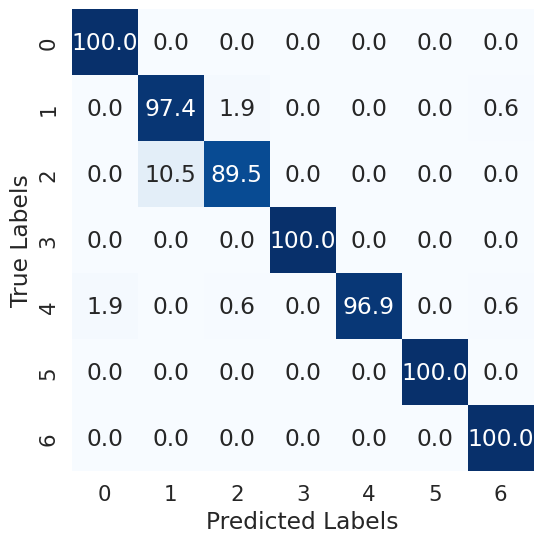

In [41]:
predictions = model.predict(x_test, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
class_counts = np.unique(true_labels, return_counts=True)[1]
class_percents = np.round(100 * class_counts / sum(class_counts), decimals=1)
class_names = sorted(np.unique(true_labels))
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.4)
sns.heatmap(np.round(100 * cm / cm.sum(axis=1)[:, np.newaxis], decimals=1), annot=True, fmt='',
            cmap="Blues", cbar=False, square=True,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

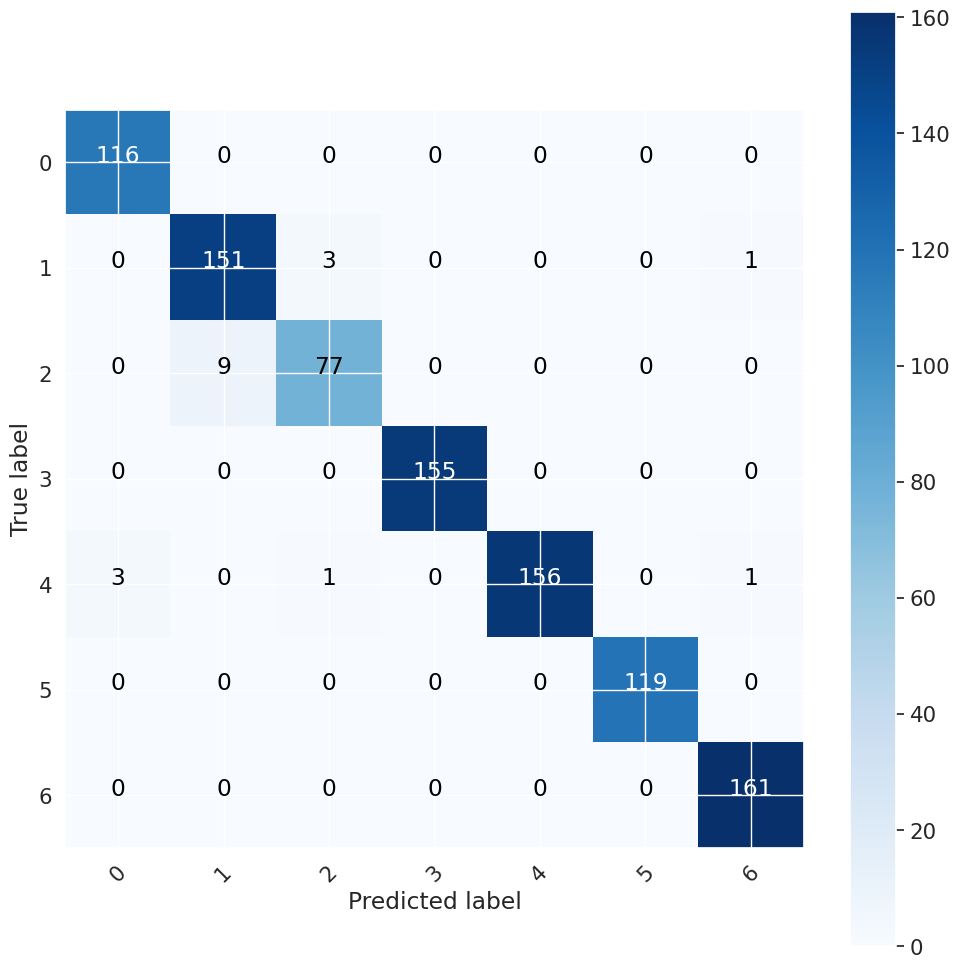

In [42]:
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(true_labels, predicted_labels)
class_names = sorted(np.unique(true_labels))

plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, classes=class_names, normalize=False)
plt.show()

In [43]:
# Define the maximum number of images to evaluate
max_images = 3589

# Calculate precision, recall, and f1-score
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

# Calculate macro/micro-averaged precision, recall, and f1-score
macro_precision = np.mean(precision[:max_images])
macro_recall = np.mean(recall[:max_images])
macro_f1_score = np.mean(f1[:max_images])

micro_precision = np.sum(np.diag(cm)[:max_images]) / np.sum(cm[:max_images])
micro_recall = np.sum(np.diag(cm)[:max_images]) / np.sum(cm[:max_images], axis=None)
micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)


# Calculate weighted precision, recall, and f1-score
weighted_precision = precision_score(true_labels[:max_images], predicted_labels[:max_images], average='weighted')
weighted_recall = recall_score(true_labels[:max_images], predicted_labels[:max_images], average='weighted')
weighted_f1_score = f1_score(true_labels[:max_images], predicted_labels[:max_images], average='weighted')

# Create a dictionary of evaluation metrics
metrics = {'Precision': [macro_precision, micro_precision, weighted_precision],
           'Recall': [macro_recall, micro_recall, weighted_recall],
           'F1-Score': [macro_f1_score, micro_f1_score, weighted_f1_score]}

# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(metrics, index=['Macro-Averaged', 'Micro-Averaged', 'Weighted'])

# Print the table
print(df)


                Precision    Recall  F1-Score
Macro-Averaged   0.979555  0.976927  0.978025
Micro-Averaged   0.981112  0.981112  0.981112
Weighted         0.981253  0.981112  0.981002
